In [252]:
import pandas as pd
!pip install --upgrade q gspread
!pip install gspread-dataframe
!pip install gspread_pandas
import numpy as np
import gspread 
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from gspread_pandas import Spread, Client
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Requirement already up-to-date: q in /usr/local/lib/python3.6/dist-packages (2.6)
Requirement already up-to-date: gspread in /usr/local/lib/python3.6/dist-packages (3.6.0)


In [155]:
gc = gspread.authorize(GoogleCredentials.get_application_default())
servidores = gc.open_by_url('https://docs.google.com/spreadsheets/d/18z9Zbx4kcJI7gFLFxN_29GxwQ_9GJuQ6jXPNw4CIbKQ/edit?usp=sharing')

In [156]:
estabelecimentos = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vwo4sQVSXAORRnECOBfa52kzvIj7FTzGgwZFY-vIfyk/edit?usp=sharing')

In [157]:
def get_ws_as_df(url_sheet, ws_name):
  ''' get the URL (parameter1) of the chosen Googlesheets, transforms it in a pandas readable, 
      get the chosen worksheet's name (parameter2)and transforms it into a dataframe with the chosen DataFrame name (parameter3)''' 

  df = url_sheet.worksheet(ws_name)
  df = get_as_dataframe(df)
  return df

In [158]:
df_servidores = get_ws_as_df(servidores, 'sisrh_cgm_2016_08')
df_arquivo = get_ws_as_df(estabelecimentos, 'Arquivo')
df_categorias = get_ws_as_df(estabelecimentos,'Categorias')
df_variaveis = get_ws_as_df(estabelecimentos, 'Variáveis')
df_DEINFO2014 = get_ws_as_df(estabelecimentos, 'DEINFO_SA_CADSAU_2014')

In [178]:
df_servidores.columns

Index(['SERVIDOR', 'SEXO', 'VINCULO', 'CONSELHO', 'ESPECIALIDAD', 'CARGO',
       'NIVEL', 'PARCEIRA', 'JORNADA', 'REGIME', 'CNES', 'DATA_INICIO',
       'DATA_FIM', 'READAPTADO', 'ATIVO'],
      dtype='object')

In [196]:
df_DEINFO2014.columns

Index(['ID', 'LONG', 'LAT', 'SETCENS', 'AREAP', 'CODDIST', 'DISTRITO',
       'CODSUBPREF', 'SUBPREF', 'REGIAO5', 'REGIAO8', 'ESTABELECI', 'ENDERECO',
       'BAIRRO', 'TELEFONE', 'CEP', 'CNES', 'SA_DEPADM', 'DEPADM', 'SA_TIPO',
       'TIPO', 'SA_CLASSE', 'CLASSE', 'LEITOS'],
      dtype='object')

In [197]:
df_DEINFO2014.dtypes

ID              int64
LONG            int64
LAT             int64
SETCENS         int64
AREAP           int64
CODDIST         int64
DISTRITO       object
CODSUBPREF      int64
SUBPREF        object
REGIAO5        object
REGIAO8        object
ESTABELECI     object
ENDERECO       object
BAIRRO         object
TELEFONE      float64
CEP           float64
CNES            Int64
SA_DEPADM       int64
DEPADM         object
SA_TIPO         int64
TIPO           object
SA_CLASSE       int64
CLASSE         object
LEITOS          int64
dtype: object

In [198]:
df_servidores['CNES'] = df_servidores['CNES'].astype('Int64')

In [188]:
df_DEINFO2014.fillna(0)
df_servidores.fillna(0)

,SERVIDOR,SEXO,VINCULO,CONSELHO,ESPECIALIDAD,CARGO,NIVEL,PARCEIRA,JORNADA,REGIME,CNES,DATA_INICIO,DATA_FIM,READAPTADO,ATIVO
0,38154,F,ESTADUAL,-,-,AUXILIAR DE SERVICOS GERAIS,O,-,J40,ADMITIDO LEI 500,2752344,10/1/1991,0,-,S
1,43713,F,PARCEIRA,-,-,AGENTE COMUNITARIO DE SAUDE,O,SANTA CATARINA,J40,CLT,2788039,10/22/2001,5/3/2006,N,N
2,43457,F,PARCEIRA,-,-,AGENTE COMUNITARIO DE SAUDE,O,IAE UNASP,J40,CLT,2787563,12/10/2001,4/7/2015,N,N
3,83426,F,HSPM,CRM,INFECTOLOGIA,MEDICO,S,-,J20,CLT,2752077,1/14/2002,4/1/2009,N,N
4,16838,F,MUNICIPAL,-,AUXILIAR DE ENFERMAGEM,AUXILIAR DE ENFERMAGEM,M,-,JET 36,EFETIVO,2079186,10/9/1995,4/1/2016,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188207,21312,F,MUNICIPAL,-,-,AUXILIAR DE ENFERMAGEM,M,-,J30,EFETIVO,2084473,10/31/1991,12/3/2003,N,N
188208,47527,F,MUNICIPAL,-,HEMOTERAPIA,AUXILIAR TECNICO DE SAUDE HEMOTERAPIA,M,-,J30,EFETIVO,2077639,6/25/1990,4/8/2015,N,N
188209,21960,F,MUNICIPAL,-,-,ASSISTENTE SOCIAL,S,-,J40,EFETIVO,3446867,6/15/1990,12/21/2015,N,N
188210,35829,F,ESTADUAL,-,-,AUXILIAR DE CONSULTORIO DENTARIO,M,-,J40,ADMITIDO LEI 500,2788632,4/15/1999,1/15/2009,N,N


In [238]:
df_DEINFO2014.CNES = df_DEINFO2014.CNES.fillna(0.0).astype('Int64')

In [239]:
df_medicos = df_servidores[(df_servidores['CARGO'] == 'MEDICO') & (df_servidores['ATIVO'] == 'S')]

In [240]:
df_medicos.shape

(13029, 15)

In [242]:
df_servi_AND_info = pd.merge(df_medicos, df_DEINFO2014[['CNES','REGIAO5']], how = 'left', on='CNES')

In [243]:
df_servi_AND_info.shape

(22647, 16)

In [244]:
df_servi_AND_info.dropna(subset=['CNES', 'REGIAO5'], inplace=True)

In [247]:
df_servi_AND_info.groupby(by='REGIAO5').count()

,SERVIDOR,SEXO,VINCULO,CONSELHO,ESPECIALIDAD,CARGO,NIVEL,PARCEIRA,JORNADA,REGIME,CNES,DATA_INICIO,DATA_FIM,READAPTADO,ATIVO
REGIAO5,,,,,,,,,,,,,,,
Centro,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,0,1362,1362
Leste,7673,7673,7673,7673,7673,7673,7673,7673,7673,7673,7673,7673,0,7673,7673
Norte,4329,4329,4329,4329,4329,4329,4329,4329,4329,4329,4329,4329,0,4329,4329
Oeste,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,0,1319,1319
Sul,6846,6846,6846,6846,6846,6846,6846,6846,6846,6846,6846,6846,0,6846,6846


In [ ]:
df_servi_AND_info['SERVIDOR'].plot(kind='pie')
plt.show()

ValueError: ignored

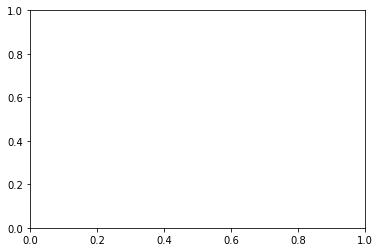

In [170]:
df_arquivo.columns

Index(['Nome', 'Descrição', 'Nível de Agregação', 'Responsável',
       'Data de referência', 'Sigilo', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [171]:
df_categorias.columns

Index(['Variável', 'Código', 'Categorias', 'Descrição', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [172]:
df_variaveis.columns

Index(['Arquivo', 'Variável', 'Nome da variável', 'Descrição da variável',
       'Fonte', 'Tipo', 'Tamanho', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [173]:
df_arquivo.dropna(axis=1, inplace=True)

In [174]:
df_arquivo

""
0
1
2
3
4
...
994
995
996
997


In [175]:
df_arquivo.isna().sum()

Series([], dtype: float64)

In [176]:
df_variaveis.isna().sum()

Arquivo                  975
Variável                 975
Nome da variável         975
Descrição da variável    975
Fonte                    975
Tipo                     975
Tamanho                  975
Unnamed: 7               999
Unnamed: 8               999
Unnamed: 9               999
Unnamed: 10              999
Unnamed: 11              999
Unnamed: 12              999
Unnamed: 13              999
Unnamed: 14              999
Unnamed: 15              999
Unnamed: 16              999
Unnamed: 17              999
Unnamed: 18              999
Unnamed: 19              999
Unnamed: 20              999
Unnamed: 21              999
Unnamed: 22              999
Unnamed: 23              999
Unnamed: 24              999
Unnamed: 25              999
dtype: int64

In [177]:
df_categorias.isna().sum()

Variável       943
Código         943
Categorias     943
Descrição      943
Unnamed: 4     999
Unnamed: 5     999
Unnamed: 6     999
Unnamed: 7     999
Unnamed: 8     999
Unnamed: 9     999
Unnamed: 10    999
Unnamed: 11    999
Unnamed: 12    999
Unnamed: 13    999
Unnamed: 14    999
Unnamed: 15    999
Unnamed: 16    999
Unnamed: 17    999
Unnamed: 18    999
Unnamed: 19    999
Unnamed: 20    999
Unnamed: 21    999
Unnamed: 22    999
Unnamed: 23    999
Unnamed: 24    999
Unnamed: 25    999
dtype: int64

In [209]:
df_DEINFO2014.head()

,ID,LONG,LAT,SETCENS,AREAP,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO5,REGIAO8,ESTABELECI,ENDERECO,BAIRRO,TELEFONE,CEP,CNES,SA_DEPADM,DEPADM,SA_TIPO,TIPO,SA_CLASSE,CLASSE,LEITOS
0,1,-46490063,-23522787,355030864000052,3550308005143,65,PONTE RASA,22,ERMELINO MATARAZZO,Leste,Leste 2,BURGO PAULISTA -AMA ESPECIALIDADES,"JOSE SILVA ALCANTARA FILHO,R,1031",BURGO PAULISTA,22800080.0,3680000.0,6393608,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
1,2,-46773393,-23673297,355030819000016,3550308005232,19,CAPAO REDONDO,17,CAMPO LIMPO,Sul,Sul 2,CAPAO REDONDO - AMA ESPECIALIDADES,"SANTANA,COM,AV,774",JD. BOA ESPERANCA,58742846.0,5666000.0,6194974,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
2,3,-46651898,-23531575,355030869000001,3550308005027,70,SANTA CECILIA,9,SE,Centro,Centro,"HUMBERTO PASCALI,DR STA CECILIA - AMA ESPECIAL...","VITORINO CARMILO,R,599",CAMPOS ELISEOS,38260096.0,1153000.0,6138314,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
3,4,-46454974,-23538945,355030837000019,3550308005202,36,ITAQUERA,27,ITAQUERA,Leste,Leste 2,ITAQUERA-AMA ESPECIALIDADES,"AMERICO SALVADOR NOVELLI,R,265",ITAQUERA,62860015.0,8210090.0,6394558,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
4,5,-46539564,-23599363,355030872000050,3550308005158,74,SAO LUCAS,29,VILA PRUDENTE,Leste,Leste 1,JD GUAIRACA - AMA ESPECIALIDADES,"ERVA IMPERIAL,R,501",CID CONTINENTAL,NaN,3244030.0,6759998,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
